
**NAMA: BAYU ASLAMA ZULFIKAR AHMAD**



Bergabung sejak 19 Nov 2019 

Kota Bandung, Jawa Barat

In [1]:
import tensorflow as tf
import sys
print(tf.__version__)
!{sys.executable} -m pip install split-folders

2.4.1


*   **Download data sets**


In [2]:
!wget --no-check-certificate \
      https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
      -O /tmp/rockpaperscissors.zip

--2021-04-28 11:39:18--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  16.9MB/s    in 14s     

2021-04-28 11:39:33 (21.9 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]




*   **UNZIP and DIVIDING DATA FOR TRAIN AND VALIDATE**


In [3]:
import zipfile,os
import splitfolders

#Unzip / Extract
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/dataset'

#Dividing Folder
splitfolders.ratio ("/tmp/rockpaperscissors/rps-cv-images", output= "/tmp/rockpaperscissors/dataset", seed=2188, ratio= (.6, .4))

rock_dir = os.path.join(base_dir, 'rock')

paper_dir = os.path.join(base_dir, 'paper')

scissors_dir = os.path.join(base_dir, 'scissors')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')




Copying files: 2188 files [00:00, 2546.96 files/s]


In [4]:
train_rock_dir = os.path.join(train_dir, 'rock')


train_paper_dir = os.path.join(train_dir, 'paper')
validation_rock_dir = os.path.join(validation_dir, 'rock')

train_scissors_dir = os.path.join(train_dir, 'scissors')


validation_paper_dir = os.path.join(validation_dir, 'paper')


validation_scissors_dir = os.path.join(validation_dir, 'scissors')





*   **AUGMENTASI GAMBAR & Using Data Generator**



In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
     
train_datagen = ImageDataGenerator(
                        rescale=1./255,
                        rotation_range=20,
                        horizontal_flip=True,
                        shear_range = 0.2,
                        fill_mode = 'nearest')
     
test_datagen = ImageDataGenerator(
                        rescale=1./255,
                        rotation_range=20,
                        horizontal_flip=True,
                        shear_range = 0.2,
                        fill_mode = 'nearest')

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  
    target_size=(150, 150),  
    batch_size=30,
    class_mode='categorical')
     
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150), 
    batch_size=30, 
    class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.




*   **SEQUENTIAL MODEL**


In [65]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 15, 15, 128)      


*   **CALL BACK**


In [66]:
class MyCustomCallBack(tf.keras.callbacks.Callback):
  timetaken = tf.timestamp()
  minutetaken = int(tf.timestamp())/60

  def on_epoch_end(self, epoch, logs=None):
    if epoch == 71:      
      print("Done in {:.2f}s ({:.2f} minutes)".format(tf.timestamp() - self.timetaken, (int(tf.timestamp())/60) - self.minutetaken ))


    if(logs['val_accuracy'] > 0.96 and logs['accuracy'] > 0.96):
      self.model.stop_training = True
      print("Done in {:.2f}s ({:.2f} minutes)".format(tf.timestamp() - self.timetaken, (int(tf.timestamp())/60) - self.minutetaken ))
    else:
      print("Running for {:.2f}s ({:.2f} minutes)".format(tf.timestamp() - self.timetaken, (int(tf.timestamp())/60) - self.minutetaken ))
customCallBack = MyCustomCallBack()

In [67]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

**TRAINING DATA**

In [68]:
history = model.fit(
      train_generator,
      steps_per_epoch=3, 
      epochs=72, 
      validation_data=validation_generator, 
      validation_steps=5,  
      verbose=2,
      callbacks=[customCallBack])

Epoch 1/72
3/3 - 9s - loss: 2.0752 - accuracy: 0.3444 - val_loss: 1.0935 - val_accuracy: 0.3400
Running for 13.99s (0.23 minutes)
Epoch 2/72
3/3 - 8s - loss: 1.1109 - accuracy: 0.4444 - val_loss: 1.1578 - val_accuracy: 0.3067
Running for 21.66s (0.37 minutes)
Epoch 3/72
3/3 - 8s - loss: 1.0995 - accuracy: 0.3444 - val_loss: 1.0890 - val_accuracy: 0.3533
Running for 29.28s (0.48 minutes)
Epoch 4/72
3/3 - 8s - loss: 1.0865 - accuracy: 0.4111 - val_loss: 1.1632 - val_accuracy: 0.3200
Running for 36.92s (0.62 minutes)
Epoch 5/72
3/3 - 8s - loss: 1.0824 - accuracy: 0.5000 - val_loss: 1.0090 - val_accuracy: 0.5133
Running for 44.53s (0.75 minutes)
Epoch 6/72
3/3 - 8s - loss: 1.1223 - accuracy: 0.4111 - val_loss: 1.0663 - val_accuracy: 0.4733
Running for 52.17s (0.87 minutes)
Epoch 7/72
3/3 - 8s - loss: 1.0666 - accuracy: 0.4778 - val_loss: 1.0084 - val_accuracy: 0.5133
Running for 59.82s (1.00 minutes)
Epoch 8/72
3/3 - 8s - loss: 0.9936 - accuracy: 0.6222 - val_loss: 0.9005 - val_accuracy: 0

**UPLOAD IMAGE FOR TESTING**

Saving Rock-paper-scissors_(paper).png to Rock-paper-scissors_(paper).png
Rock-paper-scissors_(paper).png
paper


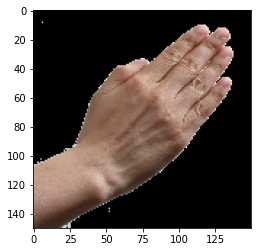

In [70]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
uploaded = files.upload()
     
for fn in uploaded.keys():
     
      # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
     
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)[0]
      
  print(fn)
if classes[0] == 1:
  print("paper")
elif classes[1] == 1:
  print("rock")
else:
  print("scissors")
  print(classes)

**PLOTTING ACCURACY AND LOSS (BETWEEN TRAIN AND VALIDATE)**

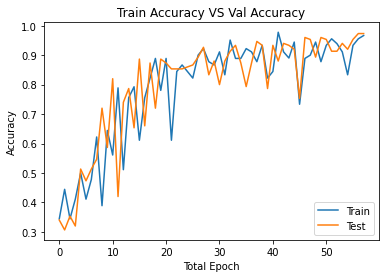

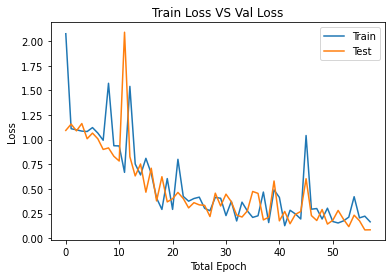

In [71]:
import matplotlib.pyplot as plt

# Plot History for Train Accuracy VS Val Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train Accuracy VS Val Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Total Epoch')
plt.yscale('linear')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
# Plot History for Train Loss VS Val Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train Loss VS Val Loss')
plt.ylabel('Loss')
plt.yscale('linear')
plt.xlabel('Total Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()
